In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ -\frac{\hbar^2}{2 m} \frac{\partial^2}{\partial x^2 } \psi \left( x \right)+ V \left(x \right) \psi \left( x \right) = E \psi \left( x \right)$$

Let $$ V \left( x \right) = 
 \begin{cases} 
      V_0 & x\leq -\frac{l}{2} \\
      0 & -\frac{l}{2} \leq x \leq \frac{l}{2} \\
      V_0 & \frac{l}{2}\leq x 
   \end{cases}
$$

Then $$ \psi \left( x \right) = 
 \begin{cases} 
      A \exp \left( k_2 x \right) & x \leq -\frac{l}{2}  \\
      B \cos \left( k_1 x \right) & -\frac{l}{2} \leq x \leq \frac{l}{2} \\
      A \exp \left( -k_2 x \right) & \frac{l}{2} \leq x 
   \end{cases}
$$

Where the coefficients can be found using the properties that $\psi \left(x \right)$ is continuous, its first derivative is continuous, and the function meets the Schrodinger equation. 

$$ k_2 = \sqrt{\frac{2 m}{\hbar^2}\left( V_0-E \right)} $$

$$ k_1 = \sqrt{\frac{2 m E}{\hbar^2}} $$

$$ \psi \left( \frac{-l}{2} \right) =
A \exp \left( - \frac{k_2 l }{2} \right) =
B \cos \left( \frac{k_1 l }{2} \right)$$

$$ \psi' \left( \frac{l}{2} \right) =
- A k_2 \exp \left( -\frac{k_2 l }{2} \right) =
- B k_1 \sin \left( \frac{k_1 l }{2} \right)$$

Let $\hbar=1$, $m=1$, $l=1$, and $V_0=100$. $ E $ should be chosen to make $ \frac{\partial}{\partial x} \psi $ continuous. 

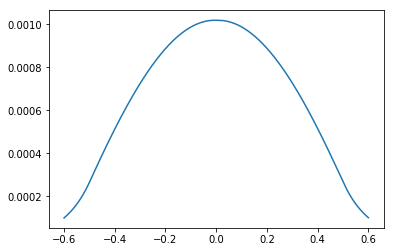

7


In [146]:
#This is my initial guess at the energy
E=7
V0=100
#This will represent the difference between the derivative in the middle
diffdpsiMin=100

def V(x):
    V=V0
    if np.abs(x)<0.5:
        V=0.0
    return V

x=[0.0]*1201
psi=[0.0]*1201
dpsi=[0.0]*1201
ddpsi=[0.0]*1201    

#The initial value of the function and its derivative need to be specified
psi[0]=0.0001
dpsi[0]=0.001

for n in range(1201):
    x[n]=-0.6+n/1000.0

for m in range(1000):
    
    #This is the energy plus a small random number to see if it is a better fit
    Etest=E+np.random.normal()

    for n in range(601):
        
        #This is the value of the second derivative from the Schrodinger Equation
        ddpsi[n]=(V(x[n])-Etest)*psi[n]
        #This is the second order Taylor Expansion of the wave function
        psi[n+1]=psi[n]+dpsi[n]*0.001+1/2*ddpsi[n]*0.001**2
        #This is the first order expansion of the derivative
        dpsi[n+1]=dpsi[n]+0.001*ddpsi[n]
        #The is the symmetry of the equation
        psi[-n]=psi[n]
        
    if(np.abs(dpsi[598]-dpsi[600])<dpsiMin):
        E=Etest
        dpsiMin=np.abs(dpsi[598]-dpsi[600])

#Making the Graph with the best fit energy
for n in range(601):
    ddpsi[n]=(V(x[n])-E)*psi[n]
    psi[n+1]=psi[n]+dpsi[n]*0.001+1/2*ddpsi[n]*0.001**2
    dpsi[n+1]=dpsi[n]+0.001*ddpsi[n]
    psi[-n]=psi[n]
        
        
plt.plot(x,psi)
plt.show()
print E

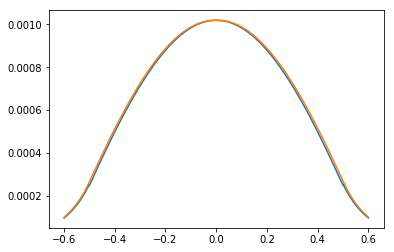

In [147]:
def psiFunc(x,k1,k2,A,B):
    val=0
    if(x<-0.5):
        val=A*np.exp(k2*x)
    elif(x<0.5):
        val=B*np.cos(k1*x)
    else:
        val=A*np.exp(-k2*x)
    return val

B = psi[601]
diffMin=0.01

for m in range(1000):
    diff=0
    
    Etest=E*(1+np.random.normal()/10)
    Btest=B*(1+np.random.normal()/10)
    k2test=np.sqrt(2*(V0-Etest))
    k1test=np.sqrt(2*Etest)
    Atest=Btest*np.cos(k1test/2)*np.exp(k2test/2)
    for n in range(len(x)):
        diff=diff+np.abs(psiFunc(x[n],k1test,k2test,Atest,Btest)-psi[n])
    if(diff<diffMin):
        E=Etest
        B=Btest
        A=Atest
        k1=k1test
        k2=k2test

        
psiFuncList=[0]*1201
for n in range(len(x)):
    psiFuncList[n]=psiFunc(x[n],k1,k2,A,B)
    
plt.plot(x,psiFuncList,x,psi)
plt.show()


The Feynman path integral form of quantum mechanics describes the probability amplitude as

$$Z \left( a,b \right) \propto \sum \exp \left( i \frac{S [ x \left( t \right) ]}{\hbar} \right)$$

$$ S = \int L \left( x, \dot{x} \right) dt = \int KE - PE dt $$

where the sum is over all paths. 

In [ ]:
def intS(dt,xi,xf):
    #always in high potential area
    if (xi<-l/2 and xf<-l/2) of (xi>l/2 and xf>l/2):
        U=V0
    #moving from left high potential area to low potential area
    if (xi<-l/2 and np.abs(xf)<l/2):
        U=V0*(-l/2-xi)/(xf-xi)
    #moving left high potential area to left high potential
    if (xf<-l/2 and np.abs(xi)<l/2):
        U=V0*l*(xf-xi)
    v=(xf-xi)/dt
    return dt*(v**2/2+)